In [4]:
__author__ = 'Thomas Rueckstiess, ruecksti@in.tum.de'

""" This example demonstrates how to use the discrete Temporal Difference
Reinforcement Learning algorithms (SARSA, Q, Q(lambda)) in a classical
fully observable MDP maze task. The goal point is the top right free
field. """

from scipy import * #@UnusedWildImport
import numpy as np
import pylab

from pybrain.rl.environments.mazes import Maze, MDPMazeTask
from pybrain.rl.learners.valuebased import ActionValueTable
from pybrain.rl.agents import LearningAgent
from pybrain.rl.learners import Q, QLambda, SARSA #@UnusedImport
from pybrain.rl.explorers import BoltzmannExplorer #@UnusedImport
from pybrain.rl.experiments import Experiment




In [5]:
def open_field(x_dim, y_dim):
    'Create a matrix of zeros surrounded by ones.'
    grid = np.zeros((y_dim, x_dim), dtype='int')
    # top and bottom boundaries
    horz_boundary = np.ones((1, x_dim), dtype='int')
    grid = np.concatenate((horz_boundary, grid, horz_boundary), axis=0)
    # right and left
    vert_boundary = np.ones((y_dim+2, 1), dtype='int')
    grid = np.concatenate((vert_boundary, grid, vert_boundary), axis=1)
    return grid

GRID_X = 7
GRID_Y = 7


In [6]:
grid = open_field(GRID_X, GRID_Y)
env = Maze(grid, (GRID_X, GRID_Y))

# create task
task = MDPMazeTask(env)

# create value table and initialize with ones
table = ActionValueTable(81, 4)   # TODO: How is 81 derived from 7 x 7 ?
table.initialize(1.)

# create agent with controller and learner - use SARSA(), Q() or QLambda() here
learner = SARSA()

# standard exploration is e-greedy, but a different type can be chosen as well
# learner.explorer = BoltzmannExplorer()

# create agent
agent = LearningAgent(table, learner)

# create experiment
experiment = Experiment(task, agent)

In [7]:
def tb_max(tbl):
    tb = tbl.params.reshape(81,4).max(1).reshape(9,9)
    return max(tb.flatten())
tb_max(table)

1.0

In [8]:
# prepare plotting
%matplotlib inline
#pylab.gray()
#pylab.ion()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from matplotlib import animation, rc
from IPython.display import HTML
# rcParams['animation.writer'] = 'ffmpeg'

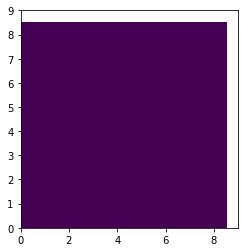

In [9]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 9))
ax.set_ylim((0, 9))
line = ax.imshow(np.zeros((9,9)), animated=True)

def im_init():
    table.initialize(1.0)
    line = ax.imshow(table.params.reshape(81,4).max(1).reshape(9,9))
    #line.set_data([], [])
    return [line]
im_init()

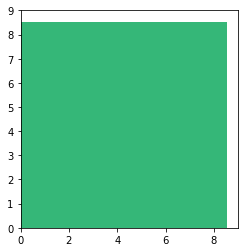

In [10]:
#fig, ax = plt.subplots()
fig = plt.figure()

ax = plt.axes( xlim =( 0,9), ylim = (0, 9))
im = plt.imshow(np.zeros((9,9)), vmin=0, vmax=1.5, animated=True)

def im_init():
    table.initialize(1.0)
#    im = plt.imshow(table.params.reshape(81,4).max(1).reshape(9,9), vmin=0, vmax=5,animated=True)
    im.set_data(table.params.reshape(81,4).max(1).reshape(9,9))
    return [im]
im_init()

tmax = [tb_max(table)]

In [11]:
def im_animate(i):
    # interact with the environment (here in batch mode)
    experiment.doInteractions(100)
    agent.learn()
    agent.reset()

    y = table.params.reshape(81,4).max(1).reshape(9,9)
    # plot
    im.set_array(y)
    tmax.append(tb_max(table))
    return [im]

In [12]:
# call the animator. blit=True means only re-draw the parts that have changed.
# See http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
im_anim = animation.FuncAnimation(fig, im_animate, init_func=im_init,
                               frames=100, interval=20, blit=True)

In [20]:
tmax

[1.0,
 1.00525324027659,
 1.0042742190764127,
 1.0037232689207296,
 1.002949402016145,
 1.002329677211673,
 1.0018879237358125,
 1.0010055497564703,
 1.0003553947434687,
 0.9991599771563852,
 0.9985957224378785,
 0.9975192375635932,
 0.9965299019215669,
 0.9955948087464127,
 0.9944868334437785,
 0.9933843593985291,
 0.9924763158481534,
 0.9913798776894477,
 0.9905098969135414,
 0.9889231592221815,
 0.9880338783234767,
 0.9970290175039208,
 0.9960068091731478,
 0.993654619926414,
 0.9925877844903697,
 0.99191504104538,
 0.9907206076414499,
 0.9888089766872741,
 0.9871084843336356,
 0.986115795569736,
 0.9962774219164183,
 0.9931128552764898,
 0.9921620838073963,
 0.9910385578762418,
 0.9900001873958719,
 0.9884305800656247,
 0.9869983628625912,
 0.9863800459943177,
 0.9904854767348377,
 0.9898971569697643,
 0.9886158177634154,
 0.9872162406537676,
 0.9850559102778322,
 0.9970713989197595,
 0.9948664944953609,
 0.9937073663497318,
 0.9929856689494022,
 0.9920738140499793,
 0.991431458811

In [13]:
HTML(im_anim.to_html5_video())

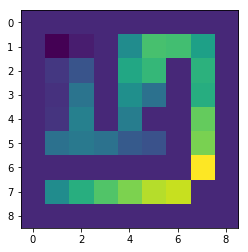

In [19]:
plt.imshow(table.params.reshape(81,4).max(1).reshape(9,9))

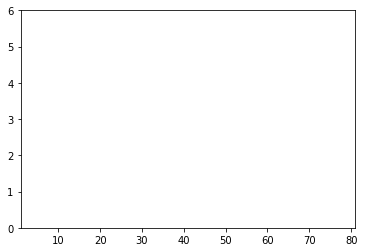

In [33]:
fig, ax = plt.subplots()

ax.set_xlim(( 1, 81))
ax.set_ylim((0, 6))
line, = ax.plot([],[], lw=2)

def init():
    line, = ax.plot(range(0,81), table.params.reshape(81,4).max(1), lw=2)
    #line.set_data([], [])
    return (line,)
#init()

In [34]:
import time
def animate(i):
    # interact with the environment (here in batch mode)
    experiment.doInteractions(100)
    agent.learn()
    agent.reset()
    x = range(0,81)
    y = table.params.reshape(81,4).max(1)
    # plot
    line.set_data(x,y)
    return(line,)

In [35]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

In [36]:
HTML(anim.to_html5_video())